In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [2]:
data = pd.read_csv("drive/MyDrive/lotery.csv")

In [3]:
data.head()

,Draw,Date,Winning Number 1,2,3,4,5,6,Additional Number,From Last,...,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize
0,3698,2021-09-23,9,35,41,42,43,44,29,NaN,...,254.0,1471.0,578.0,353.0,10763.0,50.0,13497.0,25.0,183584.0,10.0
1,3697,2021-09-20,3,6,10,16,33,49,1,10,...,129.0,1810.0,512.0,249.0,7400.0,50.0,14268.0,25.0,139019.0,10.0
2,3696,2021-09-16,9,10,15,30,38,48,2,NaN,...,69.0,2358.0,257.0,346.0,5509.0,50.0,8102.0,25.0,103275.0,10.0
3,3695,2021-09-13,6,25,26,41,42,44,37,42,...,101.0,2317.0,235.0,544.0,5810.0,50.0,7499.0,25.0,114428.0,10.0
4,3694,2021-09-09,5,19,30,33,37,42,38,33,...,64.0,2611.0,193.0,473.0,4449.0,50.0,5867.0,25.0,83213.0,10.0


In [4]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Draw,3698,3697,3696,3695,3694,3693,3692,3691,3690,3689
Date,2021-09-23,2021-09-20,2021-09-16,2021-09-13,2021-09-09,2021-09-06,2021-09-02,2021-08-30,2021-08-26,2021-08-23
Winning Number 1,9,3,9,6,5,1,3,19,5,5
2,35,6,10,25,19,15,4,23,18,17
3,41,10,15,26,30,31,6,24,24,26
4,42,16,30,41,33,32,10,27,37,27
5,43,33,38,42,37,33,19,36,38,31
6,44,49,48,44,42,44,42,37,49,48
Additional Number,29,1,2,37,38,20,34,17,35,4
From Last,NaN,10,NaN,42,33,NaN,19,"24,37",5,NaN


## EDA (Exploratory Data Analysis)

In [5]:
# Getting the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Draw                1358 non-null   int64  
 1   Date                1358 non-null   object 
 2   Winning Number 1    1358 non-null   int64  
 3   2                   1358 non-null   int64  
 4   3                   1358 non-null   int64  
 5   4                   1358 non-null   int64  
 6   5                   1358 non-null   int64  
 7   6                   1358 non-null   int64  
 8   Additional Number   1358 non-null   int64  
 9   From Last           797 non-null    object 
 10  Same As Day         181 non-null    float64
 11  Odd                 1358 non-null   int64  
 12  Even                1358 non-null   int64  
 13   1-10               1358 non-null   int64  
 14   11-20              1358 non-null   int64  
 15   21-30              1358 non-null   int64  
 16   31-40

In [6]:
data.describe()

,Draw,Winning Number 1,2,3,4,5,6,Additional Number,Same As Day,Odd,...,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.00000,181.000000,1358.000000,...,1046.00000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,704.000000,704.0
mean,3019.500000,6.827688,13.625920,20.411635,27.427835,34.150957,41.082474,23.93299,16.060773,3.053756,...,202.76195,1620.309751,478.068834,422.093690,7665.701721,43.460803,10272.977055,23.365201,146303.438920,10.0
std,392.165144,5.400243,7.018555,7.740299,7.776371,7.204767,5.905468,13.60943,8.328776,1.123565,...,162.36070,483.647303,397.929177,122.269953,7676.071453,9.386537,10469.204621,2.346634,105625.775772,0.0
min,2341.000000,1.000000,2.000000,3.000000,7.000000,12.000000,13.000000,1.00000,1.000000,0.000000,...,1.00000,335.000000,1.000000,106.000000,6.000000,30.000000,9.000000,20.000000,55320.000000,10.0
25%,2680.250000,3.000000,8.000000,15.000000,22.000000,29.000000,38.000000,13.00000,8.000000,2.000000,...,101.00000,1297.000000,248.250000,343.000000,4170.000000,30.000000,5612.000000,20.000000,91115.000000,10.0
50%,3019.500000,5.000000,13.000000,20.000000,28.000000,35.000000,42.000000,24.00000,17.000000,3.000000,...,157.00000,1596.000000,378.000000,415.000000,6165.000000,50.000000,8280.000000,25.000000,114681.500000,10.0
75%,3358.750000,9.000000,18.000000,26.000000,33.000000,40.000000,45.000000,35.00000,23.000000,4.000000,...,243.75000,1912.000000,600.000000,492.500000,9498.000000,50.000000,12814.500000,25.000000,153656.750000,10.0
max,3698.000000,35.000000,38.000000,43.000000,46.000000,48.000000,49.000000,49.00000,31.000000,6.000000,...,1900.00000,3689.000000,5248.000000,786.000000,91730.000000,50.000000,135298.000000,25.000000,964183.000000,10.0


In [7]:
# Getting the different types of columns
data.columns

Index(['Draw', 'Date', 'Winning Number 1', '2', '3', '4', '5', '6',
       'Additional Number ', 'From Last', 'Same As Day', 'Odd', 'Even',
       ' 1-10', ' 11-20', ' 21-30', ' 31-40', ' 41-50', 'Division 1 Winners',
       'Division 1 Prize', 'Division 2 Winners', 'Division 2 Prize',
       'Division 3 Winners', 'Division 3 Prize', 'Division 4 Winners',
       'Division 4 Prize', 'Division 5 Winners', 'Division 5 Prize',
       'Division 6 Winners', 'Division 6 Prize', 'Division 7 Winners',
       'Division 7 Prize'],
      dtype='object')

In [8]:
# Checking the different no. of null data
data.isna().sum()

Draw                     0
Date                     0
Winning Number 1         0
2                        0
3                        0
4                        0
5                        0
6                        0
Additional Number        0
From Last              561
Same As Day           1177
Odd                      0
Even                     0
 1-10                    0
 11-20                   0
 21-30                   0
 31-40                   0
 41-50                   0
Division 1 Winners     312
Division 1 Prize       312
Division 2 Winners     312
Division 2 Prize       312
Division 3 Winners     312
Division 3 Prize       312
Division 4 Winners     312
Division 4 Prize       312
Division 5 Winners     312
Division 5 Prize       312
Division 6 Winners     312
Division 6 Prize       312
Division 7 Winners     654
Division 7 Prize       654
dtype: int64

In [9]:
# Getting the object type data
for label, content in data.items():
  if pd.api.types.is_object_dtype(content):
    print(label)

Date
From Last


In [10]:
# Dropping the columns which are dtype
for label, content in data.items():
  if pd.api.types.is_object_dtype(content):
    data = data.drop(label, axis=1)
    print(label)

Date
From Last


In [11]:
data.columns

Index(['Draw', 'Winning Number 1', '2', '3', '4', '5', '6',
       'Additional Number ', 'Same As Day', 'Odd', 'Even', ' 1-10', ' 11-20',
       ' 21-30', ' 31-40', ' 41-50', 'Division 1 Winners', 'Division 1 Prize',
       'Division 2 Winners', 'Division 2 Prize', 'Division 3 Winners',
       'Division 3 Prize', 'Division 4 Winners', 'Division 4 Prize',
       'Division 5 Winners', 'Division 5 Prize', 'Division 6 Winners',
       'Division 6 Prize', 'Division 7 Winners', 'Division 7 Prize'],
      dtype='object')

In [12]:
data.isna().sum()

Draw                     0
Winning Number 1         0
2                        0
3                        0
4                        0
5                        0
6                        0
Additional Number        0
Same As Day           1177
Odd                      0
Even                     0
 1-10                    0
 11-20                   0
 21-30                   0
 31-40                   0
 41-50                   0
Division 1 Winners     312
Division 1 Prize       312
Division 2 Winners     312
Division 2 Prize       312
Division 3 Winners     312
Division 3 Prize       312
Division 4 Winners     312
Division 4 Prize       312
Division 5 Winners     312
Division 5 Prize       312
Division 6 Winners     312
Division 6 Prize       312
Division 7 Winners     654
Division 7 Prize       654
dtype: int64

In [13]:
# Getting the object type data
for label, content in data.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

Draw
Winning Number 1
2
3
4
5
6
Additional Number 
Same As Day
Odd
Even
 1-10
 11-20
 21-30
 31-40
 41-50
Division 1 Winners
Division 1 Prize
Division 2 Winners
Division 2 Prize
Division 3 Winners
Division 3 Prize
Division 4 Winners
Division 4 Prize
Division 5 Winners
Division 5 Prize
Division 6 Winners
Division 6 Prize
Division 7 Winners
Division 7 Prize


In [14]:
data["Same As Day"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1353   NaN
1354   NaN
1355   NaN
1356   NaN
1357   NaN
Name: Same As Day, Length: 1358, dtype: float64

In [15]:
len(data)

1358

In [16]:
data.drop("Same As Day", axis=1, inplace=True)

In [17]:
data.columns

Index(['Draw', 'Winning Number 1', '2', '3', '4', '5', '6',
       'Additional Number ', 'Odd', 'Even', ' 1-10', ' 11-20', ' 21-30',
       ' 31-40', ' 41-50', 'Division 1 Winners', 'Division 1 Prize',
       'Division 2 Winners', 'Division 2 Prize', 'Division 3 Winners',
       'Division 3 Prize', 'Division 4 Winners', 'Division 4 Prize',
       'Division 5 Winners', 'Division 5 Prize', 'Division 6 Winners',
       'Division 6 Prize', 'Division 7 Winners', 'Division 7 Prize'],
      dtype='object')

In [18]:
data.Draw

0       3698
1       3697
2       3696
3       3695
4       3694
        ... 
1353    2345
1354    2344
1355    2343
1356    2342
1357    2341
Name: Draw, Length: 1358, dtype: int64

In [19]:
data["2"]

0       35
1        6
2       10
3       25
4       19
        ..
1353    10
1354    12
1355    32
1356    18
1357    11
Name: 2, Length: 1358, dtype: int64

In [20]:
data.isna().sum()

Draw                    0
Winning Number 1        0
2                       0
3                       0
4                       0
5                       0
6                       0
Additional Number       0
Odd                     0
Even                    0
 1-10                   0
 11-20                  0
 21-30                  0
 31-40                  0
 41-50                  0
Division 1 Winners    312
Division 1 Prize      312
Division 2 Winners    312
Division 2 Prize      312
Division 3 Winners    312
Division 3 Prize      312
Division 4 Winners    312
Division 4 Prize      312
Division 5 Winners    312
Division 5 Prize      312
Division 6 Winners    312
Division 6 Prize      312
Division 7 Winners    654
Division 7 Prize      654
dtype: int64

In [21]:
data.head().T

,0,1,2,3,4
Draw,3698.0,3697.0,3696.0,3695.0,3694.0
Winning Number 1,9.0,3.0,9.0,6.0,5.0
2,35.0,6.0,10.0,25.0,19.0
3,41.0,10.0,15.0,26.0,30.0
4,42.0,16.0,30.0,41.0,33.0
5,43.0,33.0,38.0,42.0,37.0
6,44.0,49.0,48.0,44.0,42.0
Additional Number,29.0,1.0,2.0,37.0,38.0
Odd,4.0,3.0,2.0,2.0,4.0
Even,2.0,3.0,4.0,4.0,2.0


In [22]:
pd.crosstab(data["Division 1 Winners"], data["Division 1 Prize"])

Division 1 Prize,0.0,62604.0,114636.0,135959.0,154957.0,162386.0,165135.0,170871.0,173791.0,193592.0,...,8380725.0,8614827.0,8856507.0,9080133.0,9310169.0,9348725.0,9545480.0,9588137.0,9731377.0,12000000.0
Division 1 Winners,,,,,,,,,,,,,,,,,,,,,
0.0,527,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data["Division 1 Winners"].head(10)

0    2.0
1    0.0
2    0.0
3    1.0
4    0.0
5    1.0
6    1.0
7    2.0
8    0.0
9    0.0
Name: Division 1 Winners, dtype: float64

In [24]:
data["Division 1 Prize"]

0       2658290.0
1             0.0
2             0.0
3       2770889.0
4             0.0
          ...    
1353          NaN
1354          NaN
1355          NaN
1356          NaN
1357          NaN
Name: Division 1 Prize, Length: 1358, dtype: float64

In [25]:
data.head().T

,0,1,2,3,4
Draw,3698.0,3697.0,3696.0,3695.0,3694.0
Winning Number 1,9.0,3.0,9.0,6.0,5.0
2,35.0,6.0,10.0,25.0,19.0
3,41.0,10.0,15.0,26.0,30.0
4,42.0,16.0,30.0,41.0,33.0
5,43.0,33.0,38.0,42.0,37.0
6,44.0,49.0,48.0,44.0,42.0
Additional Number,29.0,1.0,2.0,37.0,38.0
Odd,4.0,3.0,2.0,2.0,4.0
Even,2.0,3.0,4.0,4.0,2.0


In [26]:
(data["Division 1 Prize"].mean())/2

474126.8513384321

In [27]:
data["Division 1 Prize"].mode()

0    0.0
Name: Division 1 Prize, dtype: float64

In [28]:
data["Division 1 Prize"].head(20)

0     2658290.0
1           0.0
2           0.0
3     2770889.0
4           0.0
5     1213578.0
6     1118709.0
7     1437544.0
8           0.0
9           0.0
10          0.0
11          0.0
12          0.0
13    1260804.0
14    1170107.0
15    2821901.0
16          0.0
17          0.0
18          0.0
19    1253392.0
Name: Division 1 Prize, dtype: float64

In [29]:
data[16::].T

,16,17,18,19,20,21,22,23,24,25,...,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357
Draw,3682.0,3681.0,3680.0,3679.0,3678.0,3677.0,3676.0,3675.0,3674.0,3673.0,...,2350.0,2349.0,2348.0,2347.0,2346.0,2345.0,2344.0,2343.0,2342.0,2341.0
Winning Number 1,1.0,3.0,1.0,4.0,3.0,18.0,7.0,8.0,4.0,14.0,...,4.0,9.0,4.0,2.0,5.0,5.0,5.0,22.0,2.0,6.0
2,7.0,8.0,21.0,10.0,5.0,19.0,9.0,14.0,5.0,31.0,...,10.0,10.0,16.0,5.0,13.0,10.0,12.0,32.0,18.0,11.0
3,22.0,30.0,26.0,21.0,9.0,23.0,15.0,20.0,9.0,32.0,...,12.0,14.0,21.0,9.0,25.0,25.0,17.0,41.0,19.0,14.0
4,33.0,34.0,38.0,33.0,14.0,24.0,20.0,28.0,17.0,33.0,...,20.0,18.0,26.0,20.0,27.0,27.0,18.0,42.0,21.0,15.0
5,40.0,39.0,44.0,42.0,23.0,38.0,23.0,29.0,31.0,38.0,...,42.0,30.0,31.0,21.0,40.0,36.0,38.0,43.0,39.0,28.0
6,48.0,46.0,45.0,44.0,26.0,45.0,40.0,36.0,34.0,47.0,...,43.0,34.0,37.0,42.0,44.0,39.0,40.0,44.0,45.0,45.0
Additional Number,10.0,44.0,17.0,19.0,20.0,27.0,2.0,18.0,8.0,45.0,...,24.0,11.0,24.0,15.0,2.0,40.0,22.0,31.0,36.0,35.0
Odd,3.0,2.0,3.0,2.0,4.0,3.0,4.0,1.0,4.0,3.0,...,1.0,1.0,3.0,3.0,4.0,4.0,2.0,2.0,4.0,3.0
Even,3.0,4.0,3.0,4.0,2.0,3.0,2.0,5.0,2.0,3.0,...,5.0,5.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0


In [30]:
data.dropna(inplace=True)

In [31]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,694,695,696,697,698,699,700,701,702,703
Draw,3698.0,3697.0,3696.0,3695.0,3694.0,3693.0,3692.0,3691.0,3690.0,3689.0,...,3004.0,3003.0,3002.0,3001.0,3000.0,2999.0,2998.0,2997.0,2996.0,2995.0
Winning Number 1,9.0,3.0,9.0,6.0,5.0,1.0,3.0,19.0,5.0,5.0,...,2.0,2.0,31.0,12.0,5.0,5.0,8.0,4.0,19.0,11.0
2,35.0,6.0,10.0,25.0,19.0,15.0,4.0,23.0,18.0,17.0,...,16.0,22.0,32.0,19.0,20.0,22.0,11.0,9.0,28.0,12.0
3,41.0,10.0,15.0,26.0,30.0,31.0,6.0,24.0,24.0,26.0,...,19.0,24.0,38.0,26.0,27.0,25.0,17.0,31.0,31.0,25.0
4,42.0,16.0,30.0,41.0,33.0,32.0,10.0,27.0,37.0,27.0,...,29.0,38.0,39.0,42.0,38.0,28.0,21.0,34.0,43.0,28.0
5,43.0,33.0,38.0,42.0,37.0,33.0,19.0,36.0,38.0,31.0,...,33.0,46.0,40.0,45.0,42.0,33.0,41.0,40.0,45.0,34.0
6,44.0,49.0,48.0,44.0,42.0,44.0,42.0,37.0,49.0,48.0,...,42.0,47.0,47.0,46.0,44.0,34.0,49.0,44.0,48.0,47.0
Additional Number,29.0,1.0,2.0,37.0,38.0,20.0,34.0,17.0,35.0,4.0,...,34.0,9.0,7.0,23.0,41.0,32.0,35.0,35.0,41.0,15.0
Odd,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,3.0,4.0,...,3.0,1.0,3.0,2.0,2.0,3.0,5.0,2.0,4.0,3.0
Even,2.0,3.0,4.0,4.0,2.0,2.0,4.0,2.0,3.0,2.0,...,3.0,5.0,3.0,4.0,4.0,3.0,1.0,4.0,2.0,3.0


In [32]:
data.isna().sum()

Draw                  0
Winning Number 1      0
2                     0
3                     0
4                     0
5                     0
6                     0
Additional Number     0
Odd                   0
Even                  0
 1-10                 0
 11-20                0
 21-30                0
 31-40                0
 41-50                0
Division 1 Winners    0
Division 1 Prize      0
Division 2 Winners    0
Division 2 Prize      0
Division 3 Winners    0
Division 3 Prize      0
Division 4 Winners    0
Division 4 Prize      0
Division 5 Winners    0
Division 5 Prize      0
Division 6 Winners    0
Division 6 Prize      0
Division 7 Winners    0
Division 7 Prize      0
dtype: int64

## Data Visualization

Text(0.5, 1.0, 'Winner of 1 vs Division 1 Prize')

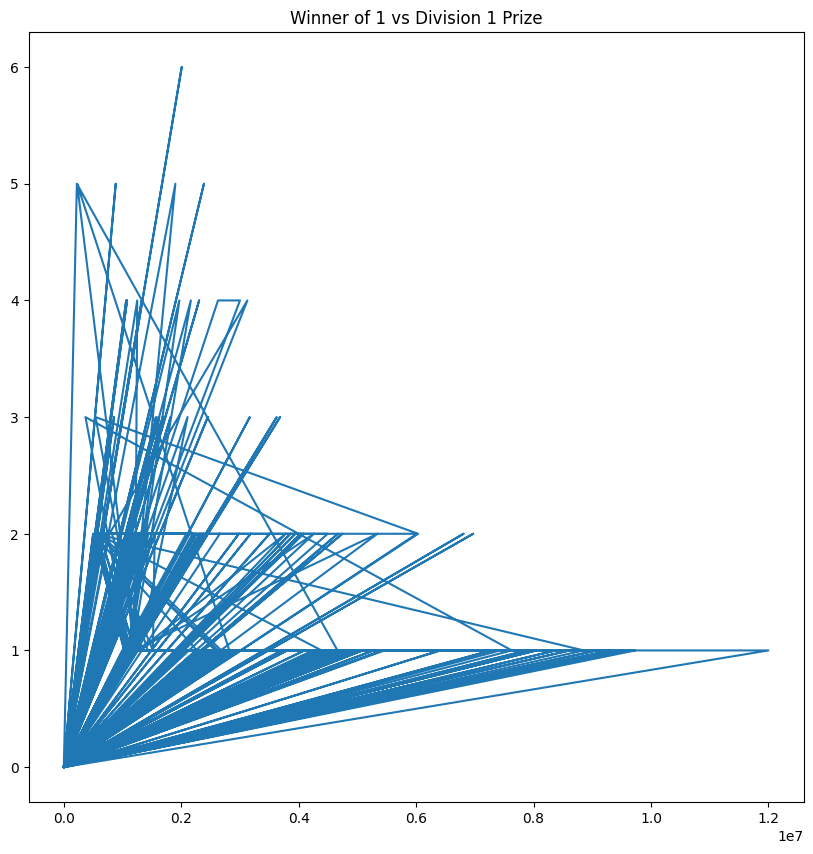

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(data["Division 1 Prize"], data["Division 1 Winners"])
plt.title("Winner of 1 vs Division 1 Prize")

In [34]:
len(data)

704

<Axes: >

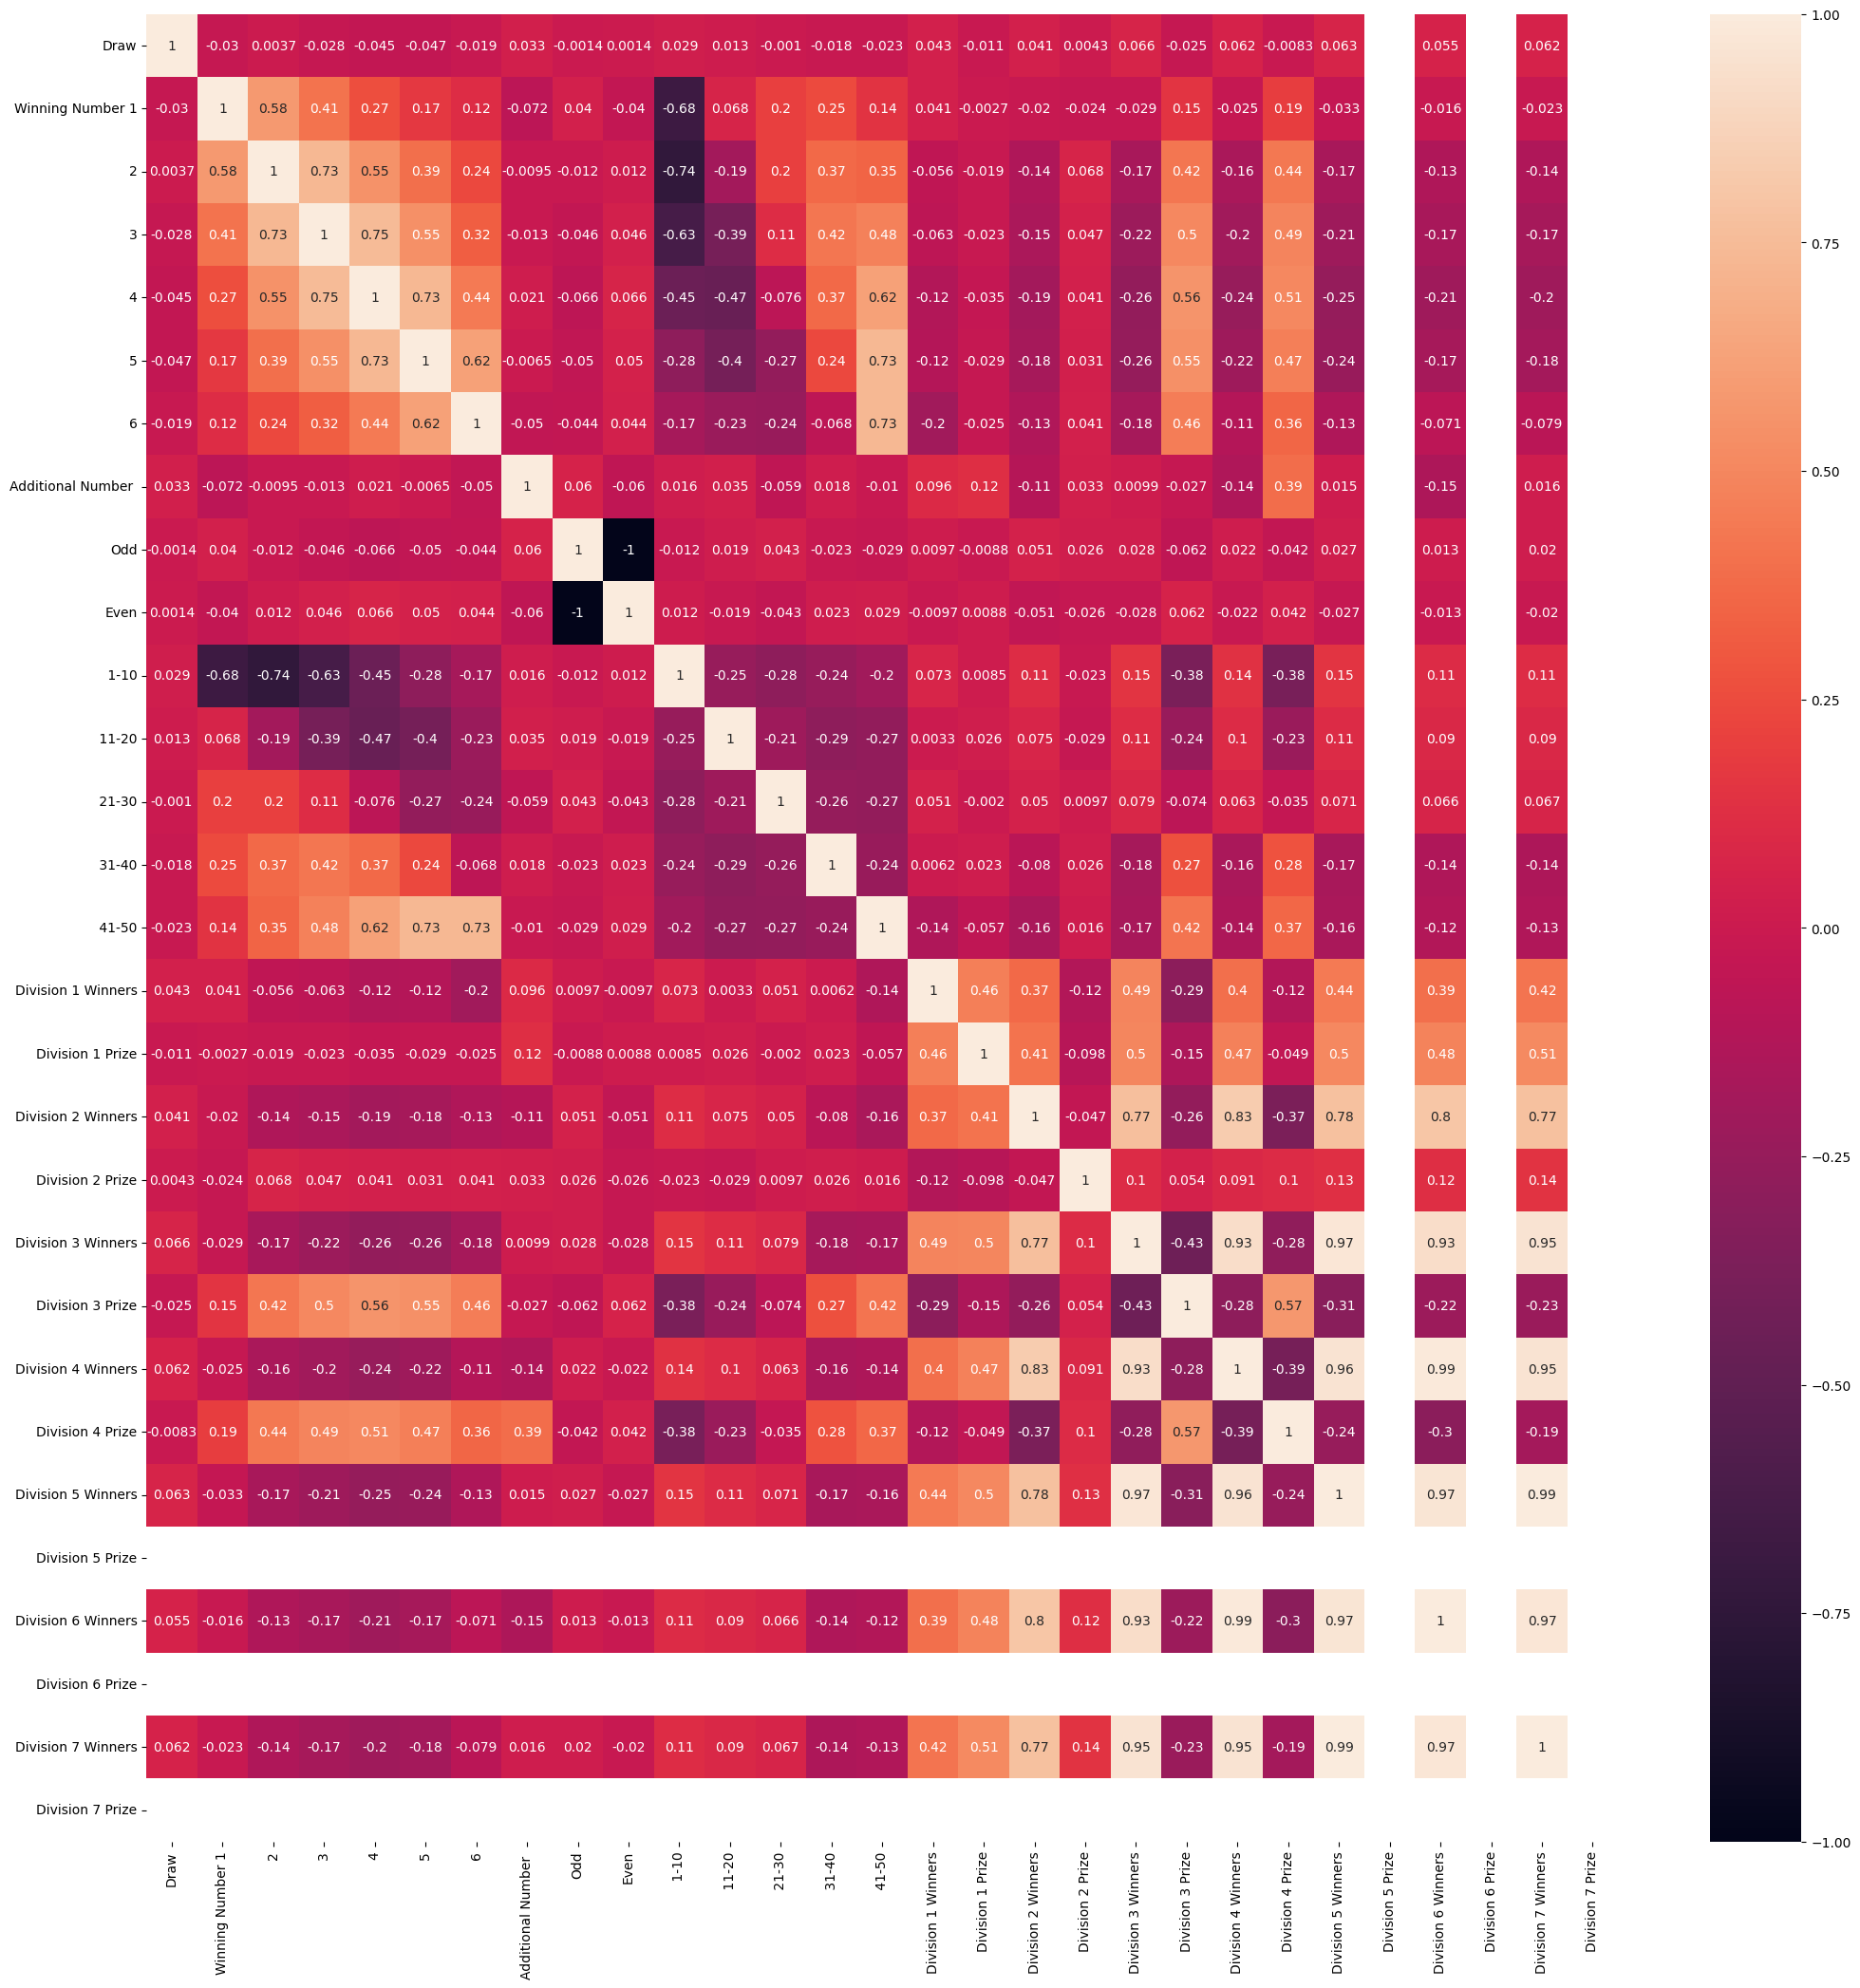

In [35]:
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True)

Text(0, 0.5, 'Division 1 Winners')

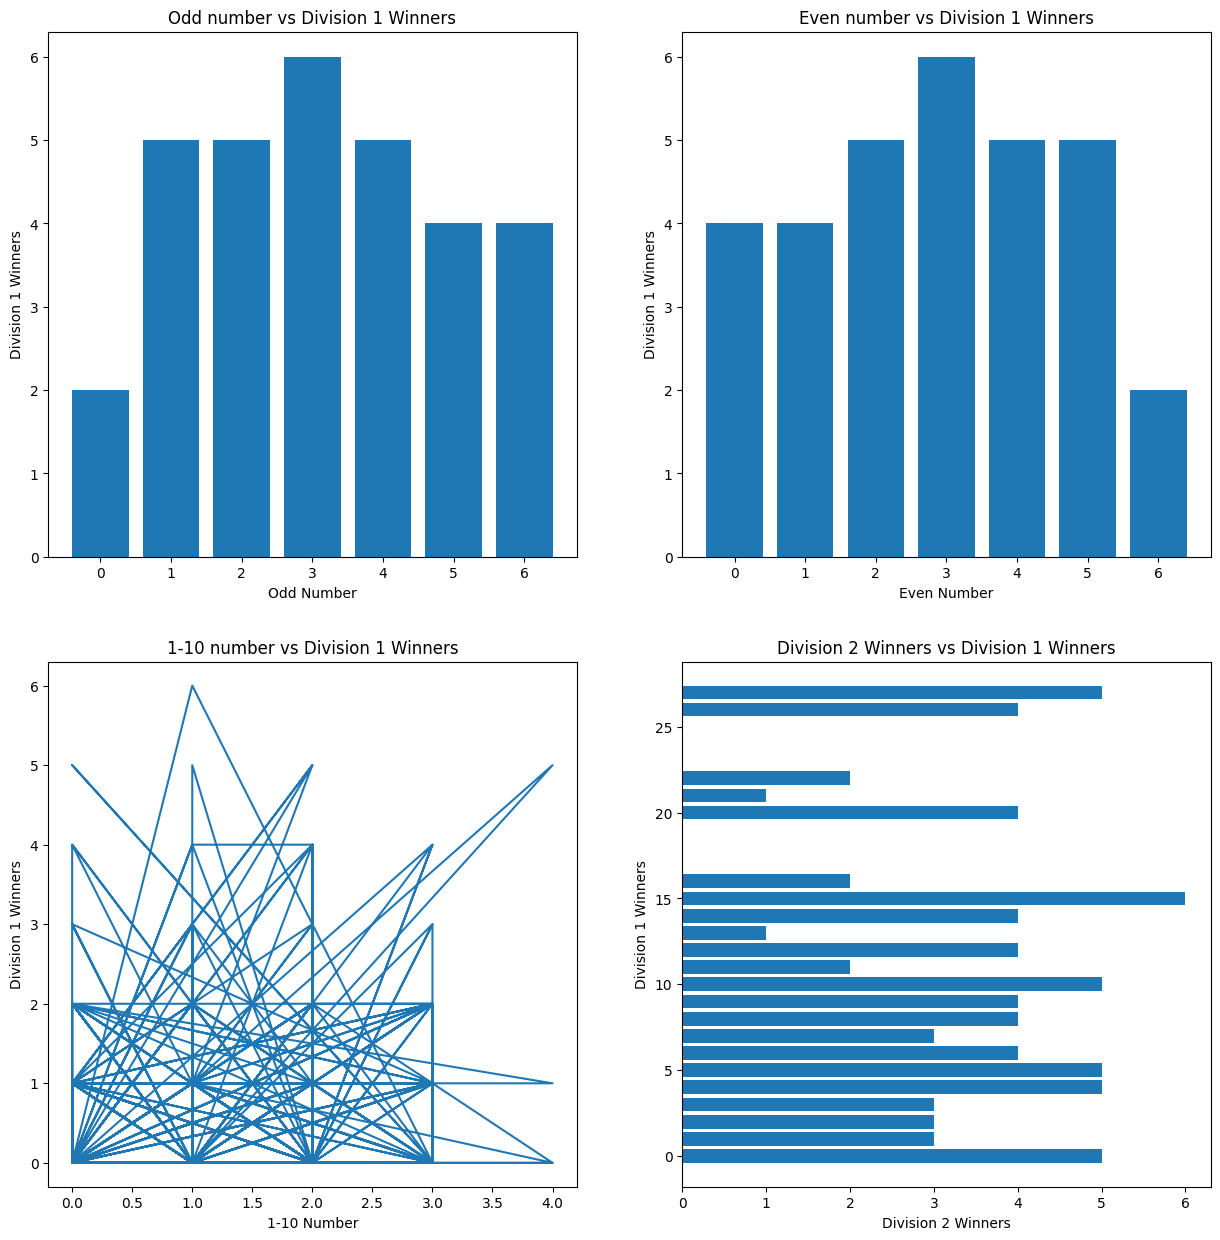

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0, 0].bar(data["Odd"], data["Division 1 Winners"])
ax[0, 0].set_title("Odd number vs Division 1 Winners")
ax[0, 0].set_xlabel("Odd Number")
ax[0, 0].set_ylabel("Division 1 Winners")

ax[0, 1].bar(data["Even"], data["Division 1 Winners"])
ax[0, 1].set_title("Even number vs Division 1 Winners")
ax[0, 1].set_xlabel("Even Number")
ax[0, 1].set_ylabel("Division 1 Winners")

ax[1, 0].plot(data[" 1-10"], data["Division 1 Winners"])
ax[1, 0].set_title("1-10 number vs Division 1 Winners")
ax[1, 0].set_xlabel("1-10 Number")
ax[1, 0].set_ylabel("Division 1 Winners")

ax[1, 1].barh(data["Division 2 Winners"], data["Division 1 Winners"])
ax[1, 1].set_title("Division 2 Winners vs Division 1 Winners")
ax[1, 1].set_xlabel("Division 2 Winners")
ax[1, 1].set_ylabel("Division 1 Winners")

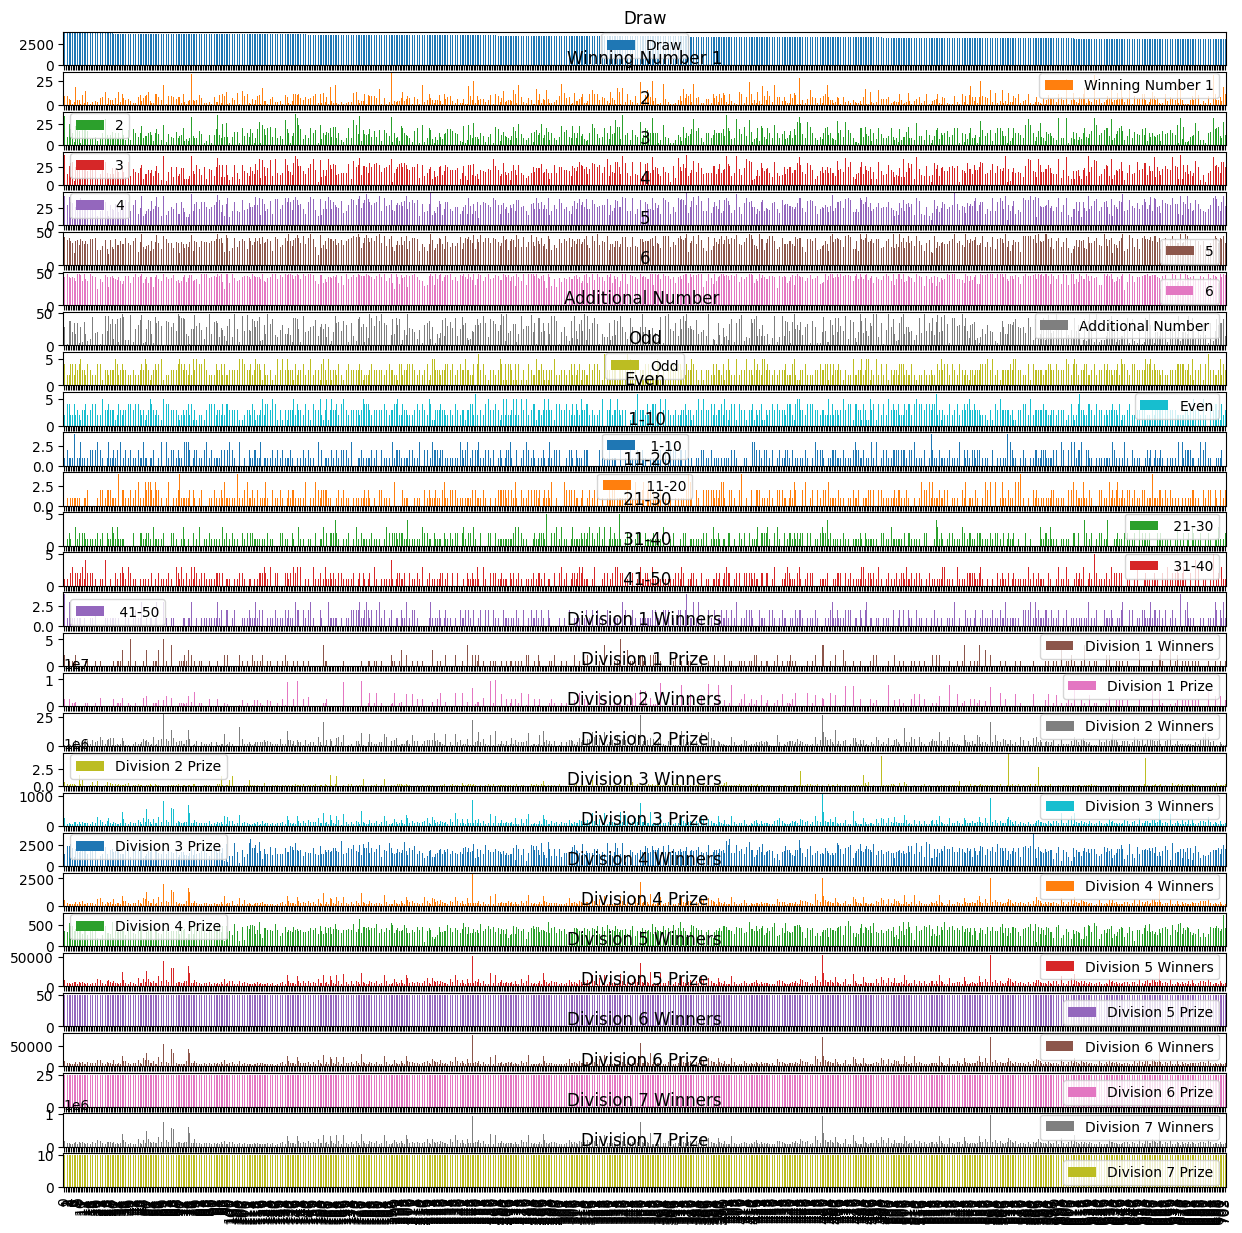

In [37]:
data.plot.bar(subplots=True, figsize=(15, 15));

In [39]:
# Create data
X = data.drop("Division 1 Winners", axis=1)
y = data["Division 1 Winners"]

scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
def metrics_report(y_val, y_pred):
  metrics = {"Mean Absolute Error": mean_absolute_error(y_val, y_pred),
             "Mean Squared Error": mean_squared_error(y_val, y_pred),
             "Mean Squared Log Error": mean_squared_log_error(y_val, y_pred),
             "R2 Score": r2_score(y_val, y_pred)}
  return metrics

## Random Forest

In [41]:
rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
metrics_report(y_test, rf_pred)

{'Mean Absolute Error': 0.11198581560283688,
 'Mean Squared Error': 0.09230709219858156,
 'Mean Squared Log Error': 0.007346654582453682,
 'R2 Score': 0.9133869501604682}

## Decision Tree

In [42]:
tree_clf = DecisionTreeRegressor()
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)
metrics_report(y_test, rf_pred)

{'Mean Absolute Error': 0.11198581560283688,
 'Mean Squared Error': 0.09230709219858156,
 'Mean Squared Log Error': 0.007346654582453682,
 'R2 Score': 0.9133869501604682}

## Support Vector Regressor`

In [43]:
svr_clf = SVR()
svr_clf.fit(X_train, y_train)
svr_pred = svr_clf.predict(X_test)
metrics_report(y_test, svr_pred)

{'Mean Absolute Error': 0.2955014670052558,
 'Mean Squared Error': 0.44750222129791467,
 'Mean Squared Log Error': 0.04782906447083663,
 'R2 Score': 0.5801023380392749}

## SGD Regressor

In [45]:
sgd_clf = SGDRegressor()
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)
sgd_clf.score(X_test, y_test)

-6.083265085634093e+41